# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [7]:
data = pd.read_csv('weight-height.csv')
male_df =  data.loc[data.Gender=='Male']
female_df =  data.loc[data.Gender=='Female']
print("Male Height mean:", male_df.Height.mean())
print("Male Height sd:", male_df.Height.std())
print("Male Weight mean:", male_df.Weight.mean())  
print("Male Height sd:", male_df.Weight.std())
print("Female Height mean:", female_df.Height.mean())
print("Female Height sd:", female_df.Height.std())
print("Female Weight mean:", female_df.Weight.mean())
print("Female Weight sd:", female_df.Weight.std())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621737
Male Height sd: 2.8633622286606517
Male Weight mean: 187.0206206581929
Male Height sd: 19.781154516763813
Female Height mean: 63.708773603424916
Female Height sd: 2.696284015765056
Female Weight mean: 135.8600930074687
Female Weight sd: 19.022467805319007


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

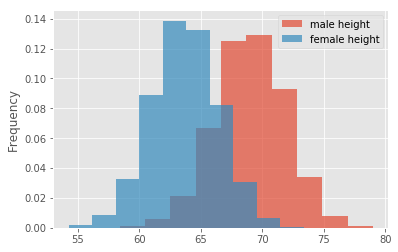

In [16]:
plt.hist(male_df.Height, bins = 10, alpha = 0.7, label = 'male height', density=True)
female_df.Height.plot.hist(bins = 10, label = 'female height', alpha = 0.7, density=True)
plt.legend()

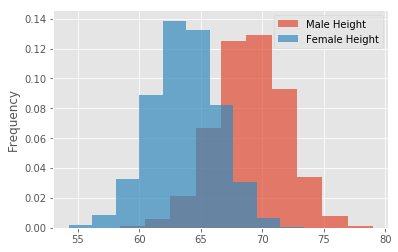

In [ ]:
# Record your observations - are these inline with your personal observations?

#males tend to be taller than females, which is inline with my personal observations.

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

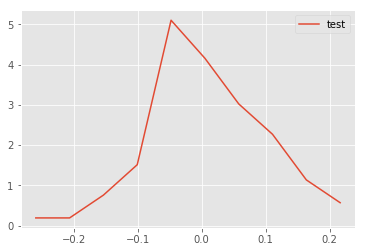

In [20]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

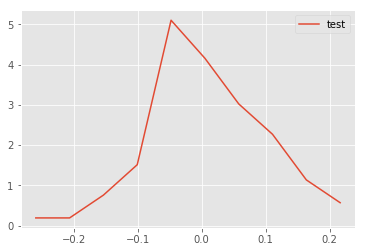

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

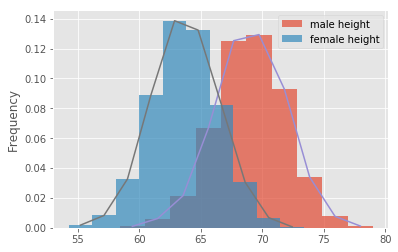

In [21]:
# You code here 
plt.hist(male_df.Height, bins = 10, alpha = 0.7, label = 'male height', density=True)
female_df.Height.plot.hist(bins = 10, label = 'female height', alpha = 0.7, density=True)

x,y = density(male_df.Height)
plt.plot(x,y)
x1,y1 = density(female_df.Height)
plt.plot(x1,y1)
plt.legend()

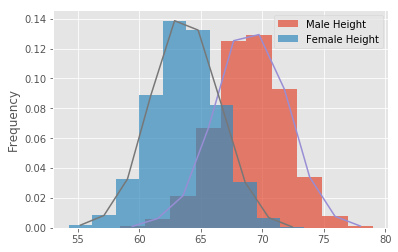

#### Repeat above exerice for male and female weights

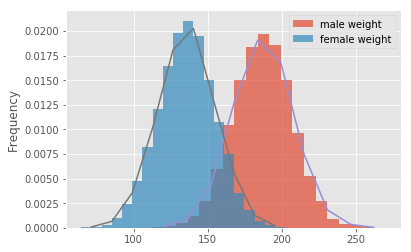

In [31]:
# Your code here 
plt.hist(male_df.Weight, bins = 20, alpha = 0.7, label = 'male weight', density=True)
female_df.Weight.plot.hist(bins = 20, label = 'female weight', alpha = 0.7, density=True)

x,y = density(male_df.Weight)
plt.plot(x,y)
x1,y1 = density(female_df.Weight)
plt.plot(x1,y1)
plt.legend()

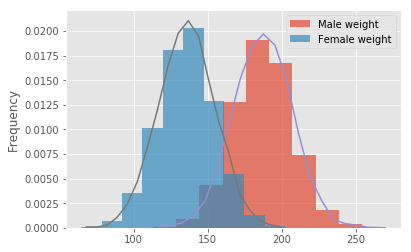

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?

#men tend to weigh more than women


# So whats the takeaway when comparing male and female heights and weights 
#the diference in weight is greater than the difference in height.


#### Repeat Above experiments in seaborn and compare with your results. 

Text(0.5,1,'Comparing Heights')

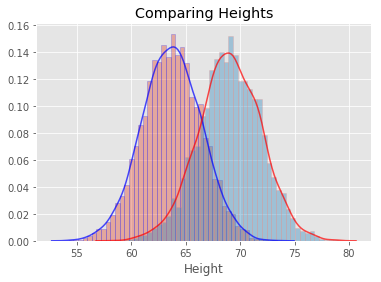

In [27]:
#fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )
import seaborn as sns
sns.distplot(female_df.Height, 
             hist=True, hist_kws={
                                  
                                  "edgecolor" :'blue',
                                  "alpha": 0.4, 
                                  
                            
                                  },
             kde=True, kde_kws = {
                                  'color': "blue",
                                  "alpha": 0.7,
                                
                                 },

             )
sns.distplot(male_df.Height, 
             hist=True, hist_kws={
                            
                                  "edgecolor" :'salmon',
                                  "alpha": 0.4, 
                                  
                            
                                  },
             kde=True, kde_kws = {
                                  'color': "red",
                                  "alpha": 0.7,
                                
                                 },

             ).set_title('Comparing Heights')




Text(0.5,1,'Comparing weights')

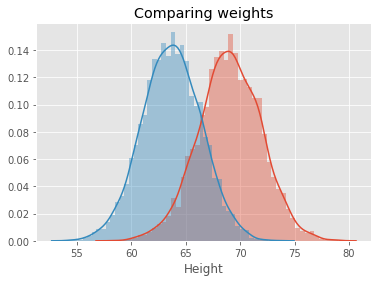

Text(0.5,1,'Comparing Weights')

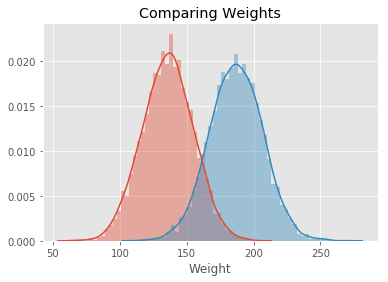

In [29]:
import seaborn as sns
sns.distplot(female_df.Weight, 
             hist=True,
             kde=True
             )
sns.distplot(male_df.Weight, 
             hist=True,
             kde=True
             ).set_title('Comparing Weights')

Text(0.5,1,'Comparing Weights')

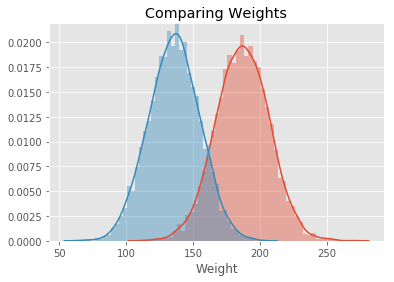

In [ ]:
# Your comments on the two approaches here. 
# easier to use seaborn because we didn't have to use interpolation for plotting kde. 
#    And the seaborn graphs look a bit nicer.

# are they similar ? what makes them different if they are ?
# They are similar in that they are the same kind of graphs using the same data.
# With seaborn the kde graph line is smoother, there are more bins by default, and options to customize the graphs 
# more easily.


## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.